# API Bing Web Search

## Installs

In [ ]:
!pip install PyPDF4

     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for PyPDF4: filename=PyPDF4-1.27.0-py3-none-any.whl size=61248 sha256=5fc4855311c621593ecc31fd792b2a2ebeda194a6ec3feae93916c3fefe4084a
  Stored in directory: /root/.cache/pip/wheels/82/db/a8/ab40e2699944d458726831fed55791a14d800e0dc5a4889869
Successfully built PyPDF4


## Imports

In [ ]:
import requests
import time
import re
import os
import PyPDF4
import io
import matplotlib.pyplot as plt

## Subscription Key

In [ ]:
subscription_key = "bac181b9c2734bdeaf0b2f4748eea0e6"
assert subscription_key

## Configurando busca

In [ ]:
querie = " "

In [ ]:
search_url = "https://api.bing.microsoft.com/v7.0/search"

In [ ]:
search_term = "site:https://storage.googleapis.com/robust04-public " + querie

In [ ]:
headers = {"Ocp-Apim-Subscription-Key": subscription_key}
params = {"q": search_term, "textDecorations": False, "textFormat": "HTML", "count":50, 'offset':0}
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()
search_results = response.json()

## Testes

In [ ]:
# Número de documentos estimados para a busca
search_results['webPages']['totalEstimatedMatches']

78

In [ ]:
# Número de documentos retornados para a página
print(len(search_results['webPages']["value"]))

49


In [ ]:
# URLs dos documentos retornados
for i in search_results['webPages']["value"]:
  print(i['url'])

https://storage.googleapis.com/robust04-public/FTJDBMBGHFE.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGGJF.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGGJB.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGGID.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGGJG.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGGII.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGHDC.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGHFC.pdf
https://storage.googleapis.com/robust04-public/deo4.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGHED.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGHBD.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGHEB.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGHDH.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGHDE.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGHEH.pdf
https://storage.googleapis.com/robust04-public/FTJDBMBGHDD.pdf

## Pegar todos os URLs

In [ ]:
all_urls = []

for j in range(10):

  headers = {"Ocp-Apim-Subscription-Key": subscription_key}
  params = {"q": search_term, "textDecorations": False, "textFormat": "HTML", "count":50, "offset":j*10}
  response = requests.get(search_url, headers=headers, params=params)
  response.raise_for_status()
  search_results = response.json()

  time.sleep(1)

  for i in search_results['webPages']["value"]:

    result = re.search(r'public/(.*).pdf', i['url'])
    m = result.group(1)    

    if m not in all_urls:
      all_urls.append(m)

  if len(all_urls) >= search_results['webPages']['totalEstimatedMatches']:
    print(f"Obteve todos na iteração {j+1}")
    break

Obteve todos na iteração 4


In [ ]:
if len(all_urls) == 11 and all_urls.isalpha():

      m = all_urls[2:]

      m = m.replace('A','0').replace('B','1').replace('C','2').replace('D','3').replace('E','4')
      m = m.replace('F','5').replace('G','6').replace('H','7').replace('I','8').replace('J','9')
      m = m.replace('M','-')

      m = all_urls[:2] + m



## Filtro das URLs encontradas

In [ ]:
urls_encontradas, remover = [], []

for i in all_urls:
  if len(i) == 11 and i.isalpha():
    urls_encontradas.append(i)
  else:
    remover.append(i)

In [ ]:
print(f'URLs encontradas:  {len(urls_encontradas)}')
print(f'URLs para remover: {len(remover)}')

URLs encontradas:  71
URLs para remover: 9


## Leitura dos arquivos .pdf
Necessário Upload

In [ ]:
path = '/content/PDF/'

files = os.listdir(path)
files_sem = []

for f in files:
	files_sem.append(f.replace(".pdf", ""))

print(len(files_sem))
print('FTJDBMBGGGF' in files_sem)

100
True


In [ ]:
urls_faltantes = []
for i in files_sem:
  if i not in urls_encontradas:
    urls_faltantes.append(i)

In [ ]:
print(f'URLs faltantes:  {len(urls_faltantes)}')

URLs faltantes:  29


## Teste com o tamanho dos documentos

In [ ]:
buscar_lines = []
for i in urls_faltantes:
  pdfFileObj = open(r'/content/PDF/' + str(i) + '.pdf', 'rb')

  pdfReader = PyPDF4.PdfFileReader(pdfFileObj)

  pageObj = pdfReader.getPage(0)

  pages_text = pageObj.extractText()
  t = 0
  for line in io.StringIO(pages_text):
    t += 1
  print(f'{i} : {t}')
  buscar_lines.append(t)


FTJDBMBGGFF : 44
FTJDBMBGHAF : 21
FTJDBMBGHEJ : 35
FTJDBMBGGIA : 52
FTJDBMBGGGA : 10
FTJDBMBGHDF : 27
FTJDBMBGGJH : 44
FTJDBMBGHBG : 9
FTJDBMBGGGI : 29
FTJDBMBGHEC : 81
FTJDBMBGHEF : 13
FTJDBMBGHCC : 23
FTJDBMBGGHD : 4
FTJDBMBGHAC : 29
FTJDBMBGHBA : 17
FTJDBMBGGGB : 6
FTJDBMBGGHG : 57
FTJDBMBGGGE : 40
FTJDBMBGHEI : 15
FTJDBMBGGJD : 43
FTJDBMBGGGC : 11
FTJDBMBGHDI : 29
FTJDBMBGHEG : 12
FTJDBMBGHFD : 7
FTJDBMBGHBI : 46
FTJDBMBGHCH : 28
FTJDBMBGGJA : 80
FTJDBMBGHAG : 29
FTJDBMBGHDB : 54


In [ ]:
encontradas_lines = []
for i in urls_encontradas:
  pdfFileObj = open(r'/content/PDF/' + str(i) + '.pdf', 'rb')

  pdfReader = PyPDF4.PdfFileReader(pdfFileObj)

  pageObj = pdfReader.getPage(0)

  pages_text = pageObj.extractText()
  t = 0
  for line in io.StringIO(pages_text):
    t += 1
  print(f'{i} : {t}')
  encontradas_lines.append(t)

FTJDBMBGHFE : 84
FTJDBMBGGJF : 35
FTJDBMBGGJB : 9
FTJDBMBGGID : 6
FTJDBMBGGJG : 21
FTJDBMBGGII : 51
FTJDBMBGHDC : 58
FTJDBMBGHFC : 21
FTJDBMBGHED : 73
FTJDBMBGHBD : 16
FTJDBMBGHEB : 81
FTJDBMBGHDH : 29
FTJDBMBGHDE : 61
FTJDBMBGHEH : 27
FTJDBMBGHDD : 73
FTJDBMBGGJI : 10
FTJDBMBGGHA : 3
FTJDBMBGGFH : 61
FTJDBMBGHBF : 34
FTJDBMBGHEA : 89
FTJDBMBGHCI : 76
FTJDBMBGHDA : 72
FTJDBMBGHAJ : 18
FTJDBMBGHBJ : 34
FTJDBMBGGGD : 35
FTJDBMBGGGH : 64
FTJDBMBGGHI : 25
FTJDBMBGGJC : 30
FTJDBMBGGHH : 36
FTJDBMBGHCE : 32
FTJDBMBGGJJ : 30
FTJDBMBGHCD : 24
FTJDBMBGHAH : 94
FTJDBMBGHCJ : 46
FTJDBMBGGGF : 30
FTJDBMBGGHC : 119
FTJDBMBGGHF : 53
FTJDBMBGGHB : 57
FTJDBMBGHCG : 42
FTJDBMBGGHE : 38
FTJDBMBGGGJ : 65
FTJDBMBGGIH : 18
FTJDBMBGGIE : 18
FTJDBMBGGFJ : 88
FTJDBMBGHBC : 18
FTJDBMBGGFI : 20
FTJDBMBGGFG : 13
FTJDBMBGGIC : 19
FTJDBMBGGJE : 98
FTJDBMBGGIJ : 14
FTJDBMBGHCF : 19
FTJDBMBGHBE : 69
FTJDBMBGHAI : 11
FTJDBMBGGIG : 80
FTJDBMBGGIB : 22
FTJDBMBGHAB : 99
FTJDBMBGHFB : 76
FTJDBMBGHAE : 9
FTJDBMBGHAA : 23


In [ ]:
print(f'Menor número de linhas com documentos indexados:     {min(encontradas_lines)}')
print(f'Maior número de linhas com documentos não-indexados: {max(buscar_lines)}')

Menor número de linhas com documentos indexados:     3
Maior número de linhas com documentos não-indexados: 81


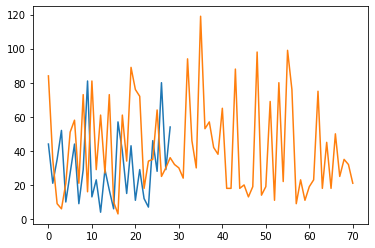

In [ ]:
plt.plot(buscar_lines)
plt.plot(encontradas_lines)
plt.show()